In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from oetils.plotting import init_plotting

In [2]:
W = init_plotting(latex=True)

In [3]:
L = 4.0
x_cm = 1.88
x1 = 1.5
x0 = 0.2
m1 = 2.0
data = pd.DataFrame({
    'm2': [1.0, 1.5, 2.0, 2.5, 3.0, 4.0],
    'x': [3.50, 2.83, 2.50, 2.32, 2.16, 2.00]
})
data

,m2,x
0,1.0,3.50
1,1.5,2.83
2,2.0,2.50
3,2.5,2.32
4,3.0,2.16
5,4.0,2.00


In [4]:
# Least squares fit
x = np.stack([np.ones(len(data)), 1 / data.m2]).T
y = data.x
w = np.linalg.lstsq(x, y, rcond=None)[0]

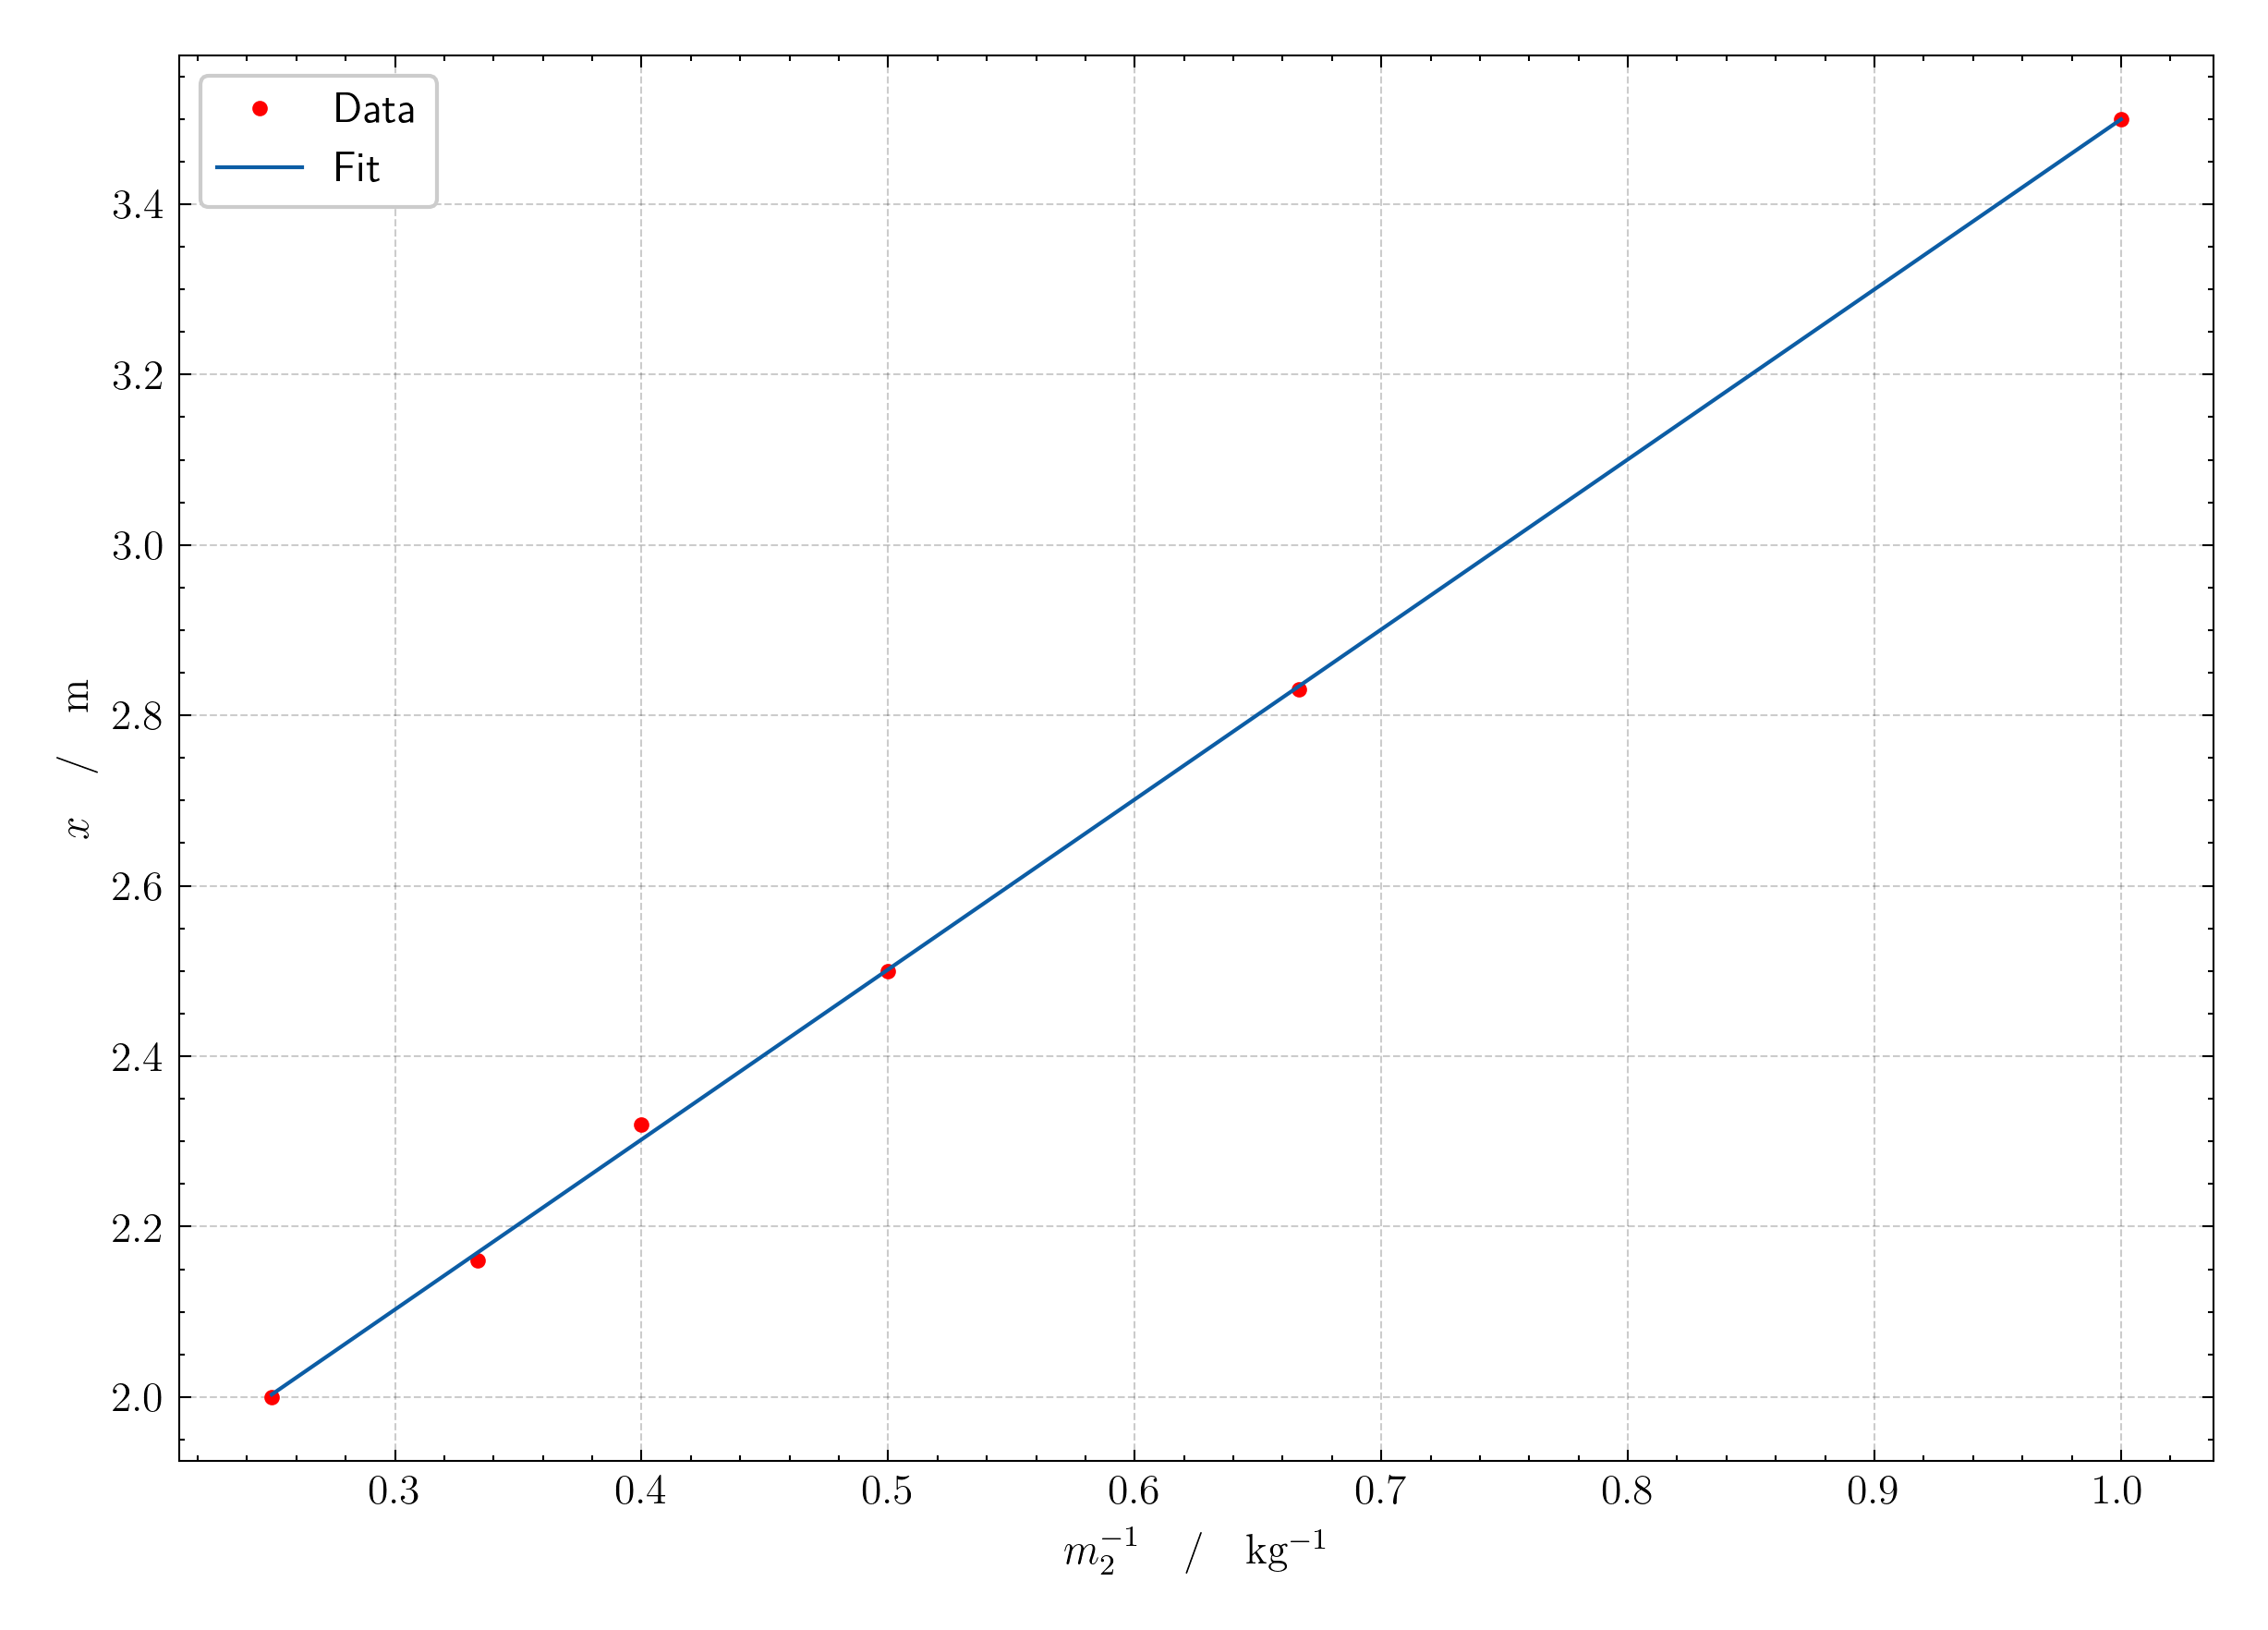

In [5]:
fig, ax = plt.subplots()
ax.set_xlabel(r"$m_2^{-1}\quad/\quad\mathrm{kg^{-1}}$")
ax.set_ylabel(r"$x\quad/\quad\mathrm{m}$")
ax.plot(1 / data.m2, data.x, 'r.', label="Data")
x = np.linspace((1 / data.m2).min(), (1 / data.m2).max())
ax.plot(x, sum(w[i] * x**i for i in range(2)), label="Fit")
ax.legend()

In [6]:
# Compute m
m = ((x1 - x0) * m1 - w[1]) / (x_cm - x1)
print(f"Mass of bar: m = {m:.2f} kg")

Mass of bar: m = 1.59 kg


In [7]:
print(f"Y-intercept of linear fit: {w[0]:.2f} m")

Y-intercept of linear fit: 1.50 m
